In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# we will generate 20 data points
N = 20

In [3]:
# random data on the x-axis in range (-5, +5)
X = np.random.random(N)*10 - 5

In [4]:
# a line plus some noise
Y = 0.5 * X - 1 + np.random.random(N)

In [5]:
# Plot the data

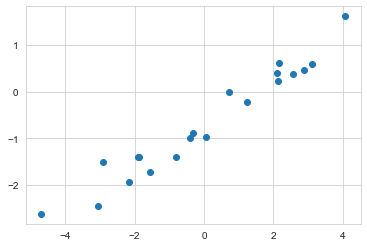

In [7]:
import seaborn as sns
sns.set_style('whitegrid')
plt.scatter(X, Y)

In [8]:
# Create the Linear Regression model
model = nn.Linear(1, 1)

In [9]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [10]:
# Reshaping the Data
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

In [12]:
# PyTorch uses float32 by default
# NumPy uses float64 by default
# So we need to change datatype of our Data in order to transform it into tensors
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [15]:
type(inputs)

torch.Tensor

In [16]:
# TRAIN THE MODEL
n_epochs = 30
losses = []
for i in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # keep the loss to plot it later
    losses.append(loss.item())
    
    # Backward and Optimize
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {i+1}/{n_epochs},  Loss: {loss.item():.4f}')

Epoch 1/30,  Loss: 0.0772
Epoch 2/30,  Loss: 0.0727
Epoch 3/30,  Loss: 0.0714
Epoch 4/30,  Loss: 0.0705
Epoch 5/30,  Loss: 0.0700
Epoch 6/30,  Loss: 0.0697
Epoch 7/30,  Loss: 0.0695
Epoch 8/30,  Loss: 0.0693
Epoch 9/30,  Loss: 0.0692
Epoch 10/30,  Loss: 0.0692
Epoch 11/30,  Loss: 0.0692
Epoch 12/30,  Loss: 0.0691
Epoch 13/30,  Loss: 0.0691
Epoch 14/30,  Loss: 0.0691
Epoch 15/30,  Loss: 0.0691
Epoch 16/30,  Loss: 0.0691
Epoch 17/30,  Loss: 0.0691
Epoch 18/30,  Loss: 0.0691
Epoch 19/30,  Loss: 0.0691
Epoch 20/30,  Loss: 0.0691
Epoch 21/30,  Loss: 0.0691
Epoch 22/30,  Loss: 0.0691
Epoch 23/30,  Loss: 0.0691
Epoch 24/30,  Loss: 0.0691
Epoch 25/30,  Loss: 0.0691
Epoch 26/30,  Loss: 0.0691
Epoch 27/30,  Loss: 0.0691
Epoch 28/30,  Loss: 0.0691
Epoch 29/30,  Loss: 0.0691
Epoch 30/30,  Loss: 0.0691


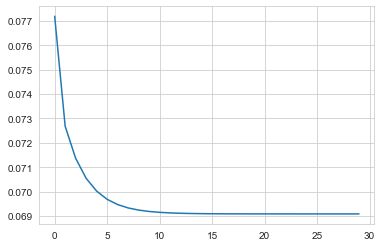

In [18]:
# Plot the Loss per iteration
plt.plot(losses)

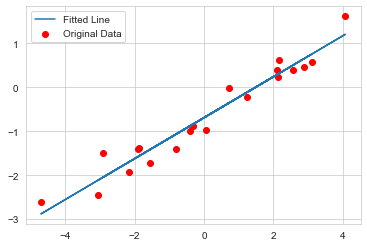

In [19]:
# Plot the graph
predicted = model(inputs).detach().numpy()   # this converts torch tensor into numpy array, since we can't plot torch tensor in matplotlib
plt.scatter(X, Y, label='Original Data', color='red')
plt.plot(X, predicted, label='Fitted Line')
plt.legend()

[[-1.6958125 ]
 [-2.0473468 ]
 [ 0.7555501 ]
 [-1.562564  ]
 [-2.1115017 ]
 [ 0.29105717]
 [-0.11879957]
 [ 0.50191826]
 [ 1.2062552 ]
 [-1.0661443 ]
 [ 0.6507812 ]
 [-0.8435012 ]
 [-1.4173055 ]
 [-0.34952757]
 [-1.5798986 ]
 [-0.88385475]
 [-2.8812802 ]
 [ 0.31084198]
 [ 0.30095702]
 [-0.66992617]]


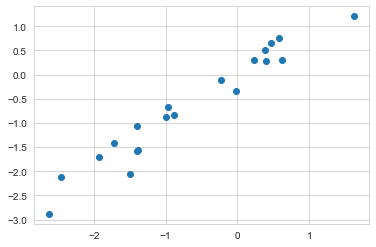

In [23]:
# Another way
with torch.no_grad():
    out = model(inputs).numpy()
plt.scatter(Y, out)
print(out)

In [24]:
# Important !
# In order to test the efficiency of our model, synthetic data is useful
# Why?
# Because *** we know the answer ***
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.4665253]] [-0.6909886]
